In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import signal

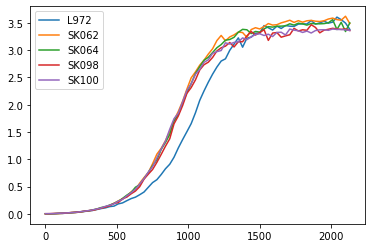

In [132]:
data_1L = pd.read_csv("data/20200819_1Llocus_growthcheck.dt1" , header=None , index_col=0)
data_2L = pd.read_csv("data/20200903_2Llocus_growthtest.dt1" , header=None , index_col=0)
data_3R = pd.read_csv("data/20200915_3Rlocus_growthtest.dt1" , header=None , index_col=0)

#それぞれのデータの並び順
#strain_1L = ["L972" , "SK062" , "SK063" , "SK064" , "SK027"]
#strain_2L = ["L972" , "SK062" , "SK063" , "SK098" , "SK099"]
#strain_3R = ["L972" , "SK062" , "SK063" , "SK100" , "SK101"]

L972 = data_1L.loc[1:72,3]
SK062 = data_1L.loc[1:72,4]
SK064 = data_1L.loc[1:72,6]
SK098 = data_2L.loc[1:72,6]
SK100 = data_3R.loc[1:72,6]

df = pd.DataFrame()
df = pd.concat([df,L972,SK062,SK064,SK098,SK100],axis=1)
df.columns=["L972","SK062","SK064","SK098","SK100"]

x = np.arange(0, 2160, 30)
strain = ["L972","SK062","SK064","SK098","SK100"]

plt.figure()
for i in range(5):
    plt.plot(x, df[strain[i]],label=strain[i])
plt.legend()
plt.show()

(array([35]),)
(array([30]),)
(array([31]),)
(array([30]),)
(array([29]),)


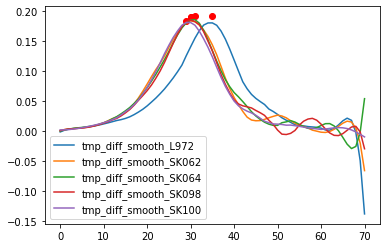

In [148]:
v = 31 
p = 5 

for i in range(5):
    tmp = signal.savgol_filter(df[strain[i]].values, 15, p)
    tmp_diff = np.diff(tmp)
    tmp_diff_smooth = signal.savgol_filter(tmp_diff, 21, p)
    arg = signal.argrelmax(tmp_diff_smooth,order=72)
    #plt.plot(x, tmp,label="tmp_"+strain[i])
    #plt.plot(tmp_diff,label="tmp_diff_"+strain[i])
    plt.plot(tmp_diff_smooth,label="tmp_diff_smooth_"+strain[i])
    plt.scatter(arg[0],tmp_diff[arg[0]],color="red")
    print(arg)
plt.legend()
plt.show()

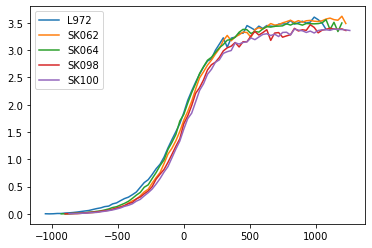

In [157]:
args = [35,30,31,30,29]

plt.figure()
for i in range(5):
    x_new = np.arange(-args[i]*30, 2160-args[i]*30, 30)
    #tmp = signal.savgol_filter(df[strain[i]].values, 15, 5)
    plt.plot(x_new, df[strain[i]].values,label=strain[i])
    #plt.scatter(x_new[args[i]],tmp[args[i]],color="red")
    plt.legend()
plt.savefig("locus-growth.pdf")

(array([35]),)


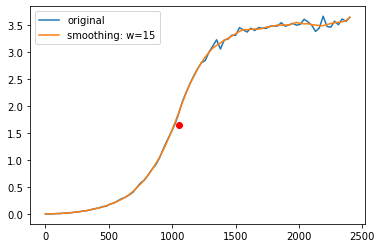

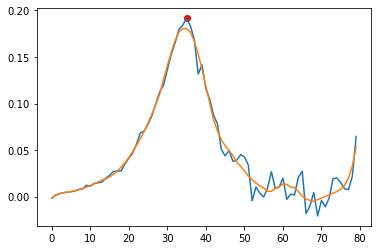

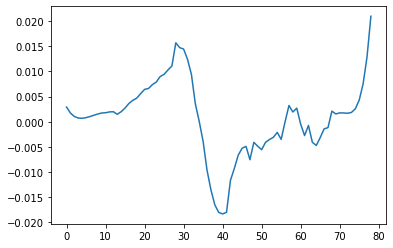

In [146]:
# Savitzly-golay filter
v = 15 # window, it must be odd number
p = 5 # 

x = np.arange(0, 2420, 30)

tmp = signal.savgol_filter(data_1L.loc[: ,3].values, v, p) #第一引数：data, 第2引数: window, 第3引数:多項式

tmp_diff = np.diff(tmp)
tmp_diff_smooth = signal.savgol_filter(tmp_diff, 21, p)
tmp_diff_smooth_diff = np.diff(tmp_diff_smooth)

arg = signal.argrelmax(tmp_diff_smooth,order=80)
print(arg)

plt.plot(x, data_1L.loc[: ,3].values,label='original')
plt.plot(x, tmp,label='smoothing: w=' + str(v))
plt.scatter(x[arg[0]],data_1L.loc[: ,3][arg[0]],color="red")
plt.legend()
plt.figure()
plt.plot(tmp_diff)
plt.plot(tmp_diff_smooth)
plt.scatter(arg[0],tmp_diff[arg[0]],color="red")
plt.figure()
plt.plot(tmp_diff_smooth_diff)

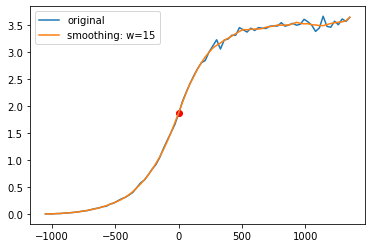

In [147]:
x_new = np.arange(-35*30, 2430-35*30, 30)
plt.plot(x_new, data_1L.loc[: ,3].values,label='original')
plt.plot(x_new, tmp,label='smoothing: w=' + str(v))
plt.scatter(x_new[arg[0]],tmp[arg[0]],color="red")
plt.legend()